# 📊 Bellabeat Case Study – Google Data Analytics Capstone

**Author:** Stephanie Korad  
**Date:** September 2025  

---

## 🔹 Introduction
Bellabeat is a high-tech manufacturer of health-focused smart products for women.  
The goal of this analysis is to understand **how women engage with smart devices** and identify **activity trends** that can inform Bellabeat’s marketing strategy.  

---

## 🔹 Business Task
Bellabeat stakeholders want to know:
1. When and how do women engage most with their smart devices?  
2. What factors influence consistency of device usage?  
3. How do activity behaviors vary across different engagement levels?  

---

## 🔹 Dataset
- Source: [Fitbit Fitness Tracker Data (Kaggle)](https://www.kaggle.com/arashnic/fitbit)  
- Time period: March 12 – May 12, 2016  
- Participants: 33 women  
- Files used:  
  - Daily activity  
  - Hourly steps  
  - Hourly calories  

---

## 🔹 Tools
- **R (tidyverse, lubridate, janitor, skimr, readr)** for data cleaning & analysis & export 
- **Tableau Public** for visualization  
- **Google Sheets** for initial verification  

---

## 🔹 Data Preparation

### 1. Load Libraries

In [1]:
library(tidyverse)
library(lubridate)
library(janitor)
library(skimr)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### 2. Import Data 

For this project, I used data from [Fitbit Fitness Tracker Data (Kaggle)](https://www.kaggle.com/arashnic/fitbit). Prior to importing the data into R, I checked the number of users in each file available to ensure that the data I was handling was homogenous. I did this on Google Sheets using a pivot table. From the 18 files, there were only 4 files that had all 33 participants. For that purpose, I chose to import the dailyActivity_merged, hourlyCalories_merged, and hourlySteps_merged files.

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

### 3. Clean Column Names & Change to Lower Case

I cleaned the names to ensure that all the column names are uniform and I changed the columns into lower cases, just for personal preference and ease of writing column names. 

In [3]:
daily_activity <- clean_names(daily_activity)
hourly_calories <- clean_names(hourly_calories)
hourly_steps <- clean_names(hourly_steps)

In [4]:
daily_activity <- rename_with(daily_activity, tolower)
hourly_calories <- rename_with(hourly_calories, tolower)
hourly_steps <- rename_with(hourly_steps, tolower)

Check the column names, data type, and the data itself.

In [5]:
head(daily_activity)
head(hourly_calories)
head(hourly_steps)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,activity_hour,calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,id,activity_hour,step_total
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


### 4. Format Dates & Times 

Just to make sure that activity date was in date format.

In [6]:
daily_activity <- daily_activity %>%
  mutate(activity_date = mdy(activity_date))

I wanted to add days of the week to the data, so I wrote this code to do so.

In [7]:
daily_activity <- daily_activity %>%
    mutate(weekday = wday(activity_date, label = TRUE, abbr = FALSE))

Checking that the weekdays have been added to the table correctly.

In [8]:
head(daily_activity)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


I wanted to change the time format of HH:MM to time of day.

In [9]:
hourly_calories <- hourly_calories %>%
  mutate(activity_hour = mdy_hms(activity_hour),
          hour = hour(activity_hour)
        )

Check that the hour of day has been added to the table correctly

In [10]:
head(hourly_calories)

,id,activity_hour,calories,hour
,<dbl>,<dttm>,<int>,<int>
1,1503960366,2016-04-12 00:00:00,81,0
2,1503960366,2016-04-12 01:00:00,61,1
3,1503960366,2016-04-12 02:00:00,59,2
4,1503960366,2016-04-12 03:00:00,47,3
5,1503960366,2016-04-12 04:00:00,48,4
6,1503960366,2016-04-12 05:00:00,48,5


In [11]:
hourly_steps <- hourly_steps %>%
  mutate(activity_hour = mdy_hms(activity_hour),
          hour = hour(activity_hour)
        )

In [12]:
head(hourly_steps)

,id,activity_hour,step_total,hour
,<dbl>,<dttm>,<int>,<int>
1,1503960366,2016-04-12 00:00:00,373,0
2,1503960366,2016-04-12 01:00:00,160,1
3,1503960366,2016-04-12 02:00:00,151,2
4,1503960366,2016-04-12 03:00:00,0,3
5,1503960366,2016-04-12 04:00:00,0,4
6,1503960366,2016-04-12 05:00:00,0,5


## 🔹 Data Engagement Classification

##### Define non-engagement days 
To ensure that the steps and calories data were valid and a reflection of engagement days, I removed days where the step count was 0 and the sedentary minutes were 1440 minutes. This indicated that the user did not move the whole day, which seemed unlikely. Therefore, the data was removed.

In [13]:
daily_activity_clean <- daily_activity %>%
  filter(!(total_steps == 0 & sedentary_minutes == 1440))

##### Expand to full 31 days & calculate engagement 
The data was recorded for 31 days, however, some users had less than 31 days of data. To identify the engagement rate of the users (i.e. how many days of the 31 days the user used the smart device), each user's number of days had to be expanding from the minimum (first day of data collection) to the maximum (last day of data collection).

In [14]:
date_range <- seq.Date(min(daily_activity$activity_date),
                       max(daily_activity$activity_date),
                       by = "day")

daily_activity_full <- expand_grid(id = unique(daily_activity$id),
                                   activity_date = date_range) %>%
  left_join(daily_activity, by = c("id", "activity_date")) %>%
  mutate(
    non_engagement = case_when(
      is.na(total_steps) ~ 1,
      total_steps == 0 & sedentary_minutes == 1440 ~ 1,
      TRUE ~ 0
    )
  )

In [15]:
head(daily_activity_full)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday,non_engagement
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<ord>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,0
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,0
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,0
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,0
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,0
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,0


##### Engagement Summary 

After standardizing the date range to 31 days, I was then able to determine the engagement rate of each user and then categorize the users into three groups: high enagagement >0.8, moderate engagement >= 0.4, and low engagement =<0.39.

In [16]:
engagement_summary <- daily_activity_full %>%
  group_by(id) %>%
  summarise(
    total_days = n(),
    engaged_days = sum(non_engagement == 0),
    engagement_rate = engaged_days / total_days
  ) %>%
  mutate(engagement_group = case_when(
    engagement_rate >= 0.8 ~ "High engagement",
    engagement_rate >= 0.4 ~ "Moderate engagement",
    TRUE ~ "Low engagement"
  ))

In [17]:
head(engagement_summary, 33)

id,total_days,engaged_days,engagement_rate,engagement_group
<dbl>,<int>,<int>,<dbl>,<chr>
1503960366,31,30,0.96774194,High engagement
1624580081,31,31,1.00000000,High engagement
1644430081,31,30,0.96774194,High engagement
1844505072,31,22,0.70967742,Moderate engagement
1927972279,31,18,0.58064516,Moderate engagement
2022484408,31,31,1.00000000,High engagement
2026352035,31,31,1.00000000,High engagement
2320127002,31,31,1.00000000,High engagement
2347167796,31,18,0.58064516,Moderate engagement


As you can see, the group is largely made up of high engagement users. Therefore, this dataset is skewed towards the behaviours of the high engagement users, thus highlighting the limitations of having a 33 user dataset (it is not representative of the population). 

## 🔹 Analysis

#### Daily Averages (Steps & Calories) 

This analysis was to determine the average daily step count and the average daily calories, as these two metrics were my main indicators of activity.

In [18]:
daily_stats <- daily_activity_clean %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE)
  )

#### Hourly Patterns (Weekday vs Weekend) 

To determine whether users engaged more during the weekday or weekend and which hours of the day were each engagement group did each group take the most steps or expended the most amount of calories, this analysis was done.

In [19]:
hourly_merged <- hourly_steps %>%
  inner_join(hourly_calories, by = c("id", "activity_hour", "hour")) %>%
  inner_join(engagement_summary %>% select(id, engagement_group), by = "id") %>%
  mutate(weektype = if_else(wday(activity_hour) %in% c(1,7), "Weekend", "Weekday"))

hourly_by_group <- hourly_merged %>%
     group_by(engagement_group, hour) %>%
     summarise(
         avg_steps = mean(step_total, na.rm = TRUE),
         avg_calories = mean(calories, na.rm = TRUE),
         .groups = "drop"
     )

hourly_patterns <- hourly_merged %>%
  group_by(engagement_group, weektype, hour) %>%
  summarise(
    avg_steps = mean(step_total, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE)
  )

`summarise()` has grouped output by 'engagement_group', 'weektype'. You can
override using the `.groups` argument.


In [20]:
head(hourly_merged)
head(hourly_by_group)
head(hourly_patterns)

,id,activity_hour,step_total,hour,calories,engagement_group,weektype
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,373,0,81,High engagement,Weekday
2,1503960366,2016-04-12 01:00:00,160,1,61,High engagement,Weekday
3,1503960366,2016-04-12 02:00:00,151,2,59,High engagement,Weekday
4,1503960366,2016-04-12 03:00:00,0,3,47,High engagement,Weekday
5,1503960366,2016-04-12 04:00:00,0,4,48,High engagement,Weekday
6,1503960366,2016-04-12 05:00:00,0,5,48,High engagement,Weekday


engagement_group,hour,avg_steps,avg_calories
<chr>,<int>,<dbl>,<dbl>
High engagement,0,44.59514,70.90415
High engagement,1,25.23209,69.11032
High engagement,2,19.15903,68.19198
High engagement,3,7.28510,66.84670
High engagement,4,15.25825,67.81492
High engagement,5,52.98278,85.36011


engagement_group,weektype,hour,avg_steps,avg_calories
<chr>,<chr>,<int>,<dbl>,<dbl>
High engagement,Weekday,0,35.668605,69.94574
High engagement,Weekday,1,21.377907,68.62984
High engagement,Weekday,2,14.162791,67.80039
High engagement,Weekday,3,7.040698,66.80039
High engagement,Weekday,4,17.003883,68.03883
High engagement,Weekday,5,65.786408,91.74563


## 🔹Export to Tableau for Visualization 

Once the analysis was done, I exported the files I needed into Tableau for the visualization. 

In [21]:
write_csv(daily_activity_clean, "daily_activity_clean.csv")
write_csv(engagement_summary, "engagement_summary.csv")
write_csv(hourly_by_group, "hourly_by_group.csv")
write_csv(hourly_patterns, "hourly_patterns.csv")

These were the files that had all the data that I needed to make the visualization that I wanted.

## 🔹 Dashboard

Interactive Tableau dashboard includes: 
* Donut chart (engagement group distribution)
* Bar chart (activity by engagement group, Steps vs Calories toggle)
* Line chart (hourly activity trends, Steps vs Calories toggle)
* Line chart (Weekday vs Weekend patterns, Steps vs Calories toggle)

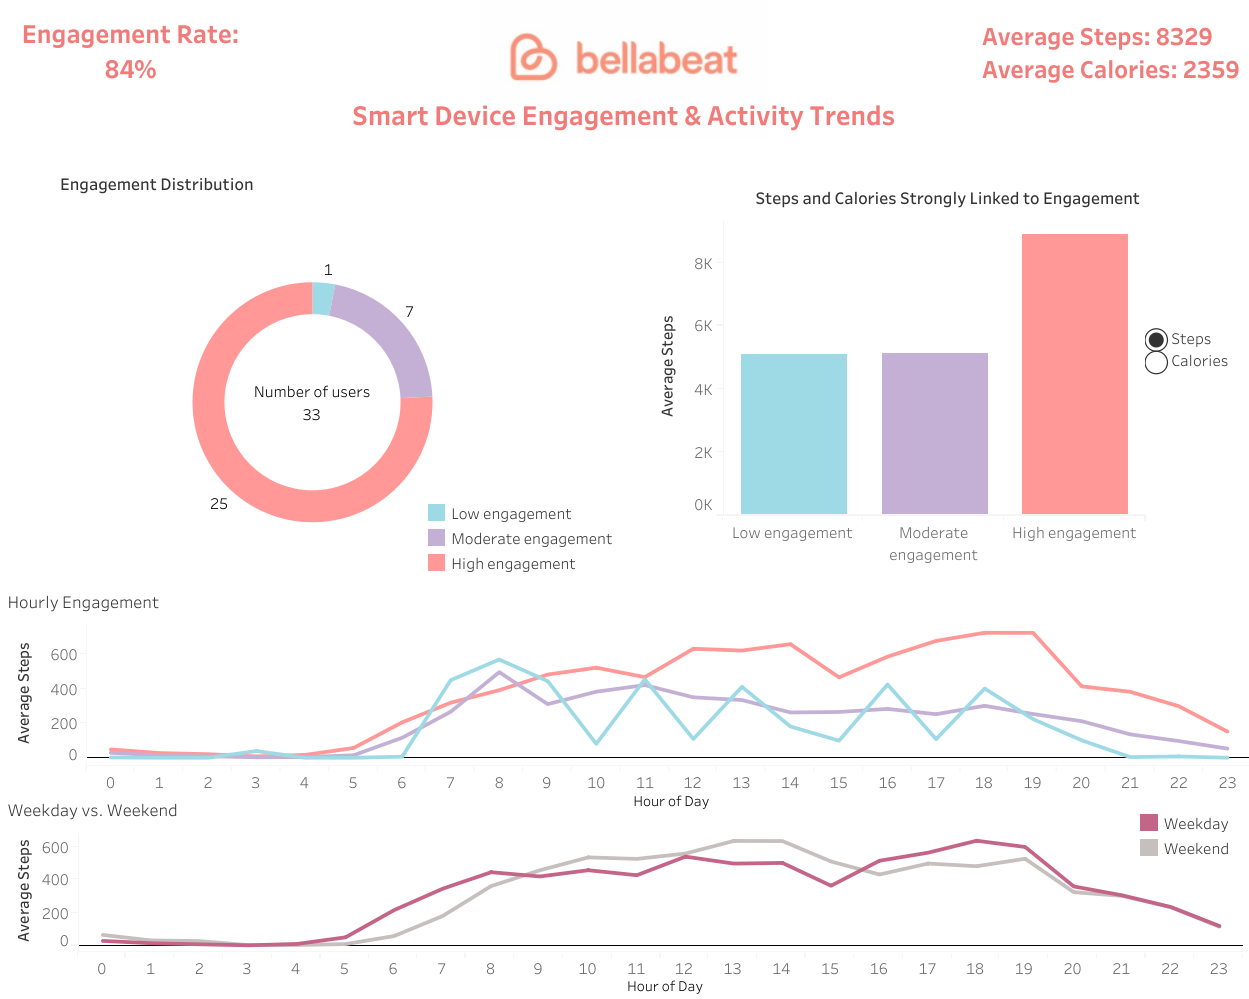

👉 View the interactive dashboard on [Tableau Public](https://public.tableau.com/views/GoogleDataAnalyticsCaseStudyBellabeat_17585757425840/SmartDeviceEngagementActivityTrends?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)


## 🔹 Key Insights & KPIs
* Engagement rate: 84% overall
* Average daily steps: 8,329
* Average daily calories: 2,359
* Hourly trends: Peak activity occurs between 5–7 PM
* Weekday vs Weekend: Less activity during the weekends with peaks happening after noon

⸻

## 🔹 Conclusions & Recommendations 

##### Conclusion
The data showed that in this cohort, the overall engagement rate of the users were 84%, making this a group of high smart device users. However, due to the limited sample size (33), this cannot be indicative of the population as a whole. The average daily steps taken was 8,329, driven by the high engagement users. This was also highlighted in the average daily calories which came in at 2,359. The data also reported that people were more active/taking more steps at 5-7pm, which coinsides with after work hours. Furthermore, users were more active on weekdays versus weekends, which may be due to people viewing weekends more of rest days instead of days for working out or people having less structure on the weekends.


##### Recommendations 

1. Health and being healthy is a strong driver for people to stay active. A review found that taking 7000+ steps per day is associated with clinically meaningful health outcomes. Bellabeat can remind users of this health benefit of reaching 7000+ steps, encourage people who are close to hitting this target before the day ends, and congratulate people who consistently surpass this milestone.
2. Send push notifications around early evening peaks (5–7 PM). Analysis showed that activity levels are consistently highest in the early evening. Bellabeat can capitalize on this by sending reminders or motivational messages just before peak hours. This capitalizes on natural user behavior and increases the chance that users engage with the device in real time.
3. Use gamification strategies to retain moderate users. Moderate-engagement users log activity on about 40–80% of days. This group is critical as they already show interest but risk disengaging. Bellabeat could add gamification elements such as streak tracking, step challenges, achievement badges, or friend leaderboards. These features create a sense of reward and accountability, nudging moderate users toward high engagement.
4. Launch weekend wellness campaigns when activity is more variable. The analysis revealed that weekend activity patterns are less consistent compared to weekdays. Bellabeat can introduce weekend-focused activities or programmes that are less strenuous and keeps engagement high such as guided yoga, outdoor walking challenges, hourly step changes (e.g. 250 steps per hour), or hydration reminders. Campaigns can also highlight flexible activity options that fit into more irregular weekend routines. By tailoring engagement to the weekend’s unique pattern, Bellabeat can improve consistency and keep users connected across all days of the week. 
5. Personalize marketing by engagement group. Instead of one-size-fits-all messaging, Bellabeat can segment users by engagement group:

* High engagement: Provide advanced analytics, performance insights, and new feature previews to maintain excitement.

* Moderate engagement: Encourage consistency with reminders, rewards, and community-driven challenges.

* Low engagement: Simplify onboarding, reduce barriers (like step goals that feel too ambitious), and highlight small wins to build trust.

This personalization ensures that each user gets the right level of support, improving retention and satisfaction.



**This is the end of my Google Analytics Capstone Case Study on Bellabeat. Thank you for tagging along.**

*If you have any recommendations and comments, please let me know :)*

